# Building a simple quantum circuit

In [1]:
# Import Qiskit
from qiskit import *

In [2]:
nqubits=3
circuit= QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

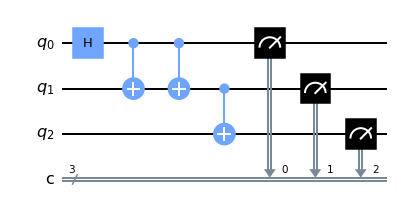

In [3]:
%matplotlib inline
circuit.draw(output="mpl")

# Simulating the quantum circuit

In [4]:
simulator=Aer.get_backend('qasm_simulator')
sim_result= execute(circuit, backend=simulator, shots=1024).result()

In [30]:
from qiskit.tools.visualization import plot_histogram

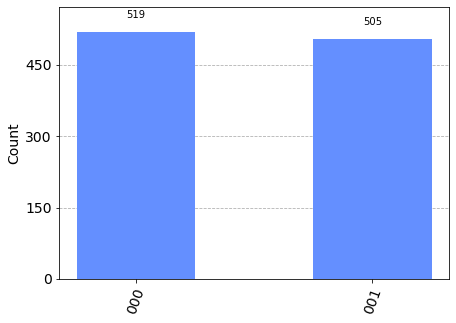

In [6]:
plot_histogram(sim_result.get_counts(circuit))

# Running the quantum circuit on a real quantum computer

In [31]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_qasm_simulator')

ibmqfactory.load_account:WARNING:2023-11-15 20:24:13,606: Credentials are already in use. The existing account in the session will be replaced.


In [8]:
job= execute(circuit, backend= device, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

clacbovl4q34kqi81rt0
Job Status: job has successfully run


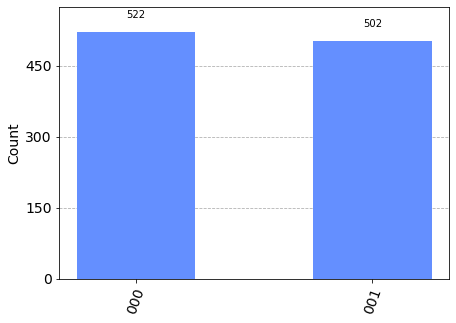

In [9]:
device_result= job.result()
plot_histogram(device_result.get_counts(circuit))


In [10]:
#Install Ignis
pip install qiskit-ignis


Note: you may need to restart the kernel to use updated packages.


# Calibrating measurement errors using Qiskit Ignis

In [11]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)


C:\Users\aaish\AppData\Local\Temp\ipykernel_12080\3791489991.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)


In [12]:
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], circlabel='measerrormitigationcal')

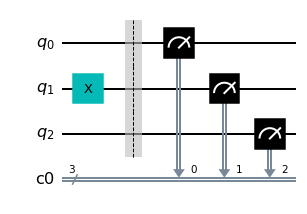

In [13]:
cal_circuits[2].draw(output="mpl")

In [14]:
len(cal_circuits)

8

In [15]:
cal_job= execute(cal_circuits,backend=device, shots=8192, optimization_level= 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results=cal_job.result()

clacbs57pau17fmla0c0
Job Status: job has successfully run


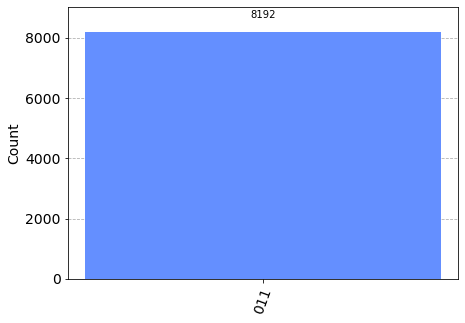

In [16]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

# Creating the Measurement Fitter Object in Ignis

In [17]:
meas_fitter= CompleteMeasFitter(cal_results, state_labels)

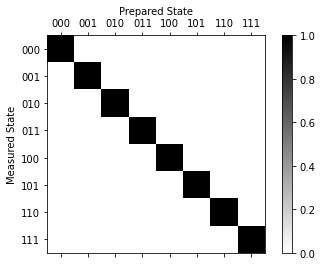

In [19]:
meas_fitter.plot_calibration()


In [20]:
meas_filter = meas_fitter.filter

# Mitigating the measurement errors in our previous device run

In [21]:
mitigated_result= meas_filter.apply(device_result)

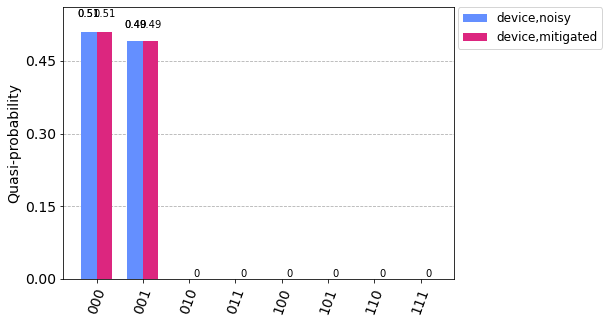

In [22]:
device_counts=device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['device,noisy' , 'device,mitigated'])


# Running error mitigation on a second circuit

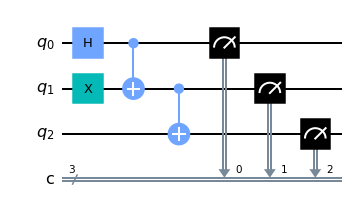

In [23]:
circuit2=QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output='mpl')

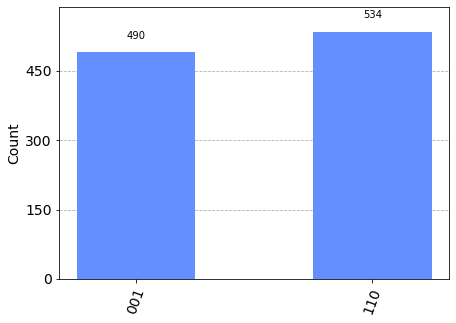

In [24]:
plot_histogram(
 execute(circuit2, backend=simulator, shots= 1024).result().get_counts(circuit2)
)

In [25]:
device_counts_2=execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)

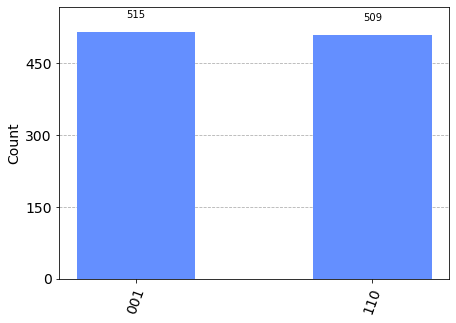

In [26]:
plot_histogram(device_counts_2)